・Shader & Grover

0.25 0.25
-0.25 0.25
-0.25 -0.25
0.25 -0.25
0.25 0.25
-0.25 0.25
-0.25 -0.25
0.25 -0.25
0.25 0.25
-0.25 0.25
-0.25 -0.25
0.25 -0.25
0.25 0.25
-0.25 0.25
-0.25 -0.25
0.25 -0.25


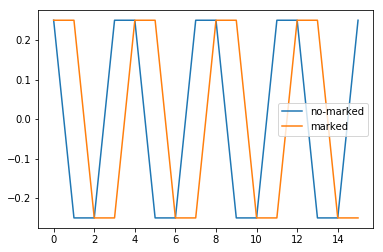

In [194]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 8 # count_number
b = [1.0/4.0, 1.0/4.0]
print(b[0], b[1])
image0 = [b[0]]
image1 = [b[1]]

for i in range(15):
    b[1] = -b[1]
    average = a*b[0] + (16-a)*b[1]
    average /= 16.0
    #print(average)

    b[0] = 2*average - b[0]
    b[1] = 2*average - b[1]
    print(b[0], b[1])
    #print(abs(b[0]), abs(b[1]))
    
    image0.append(b[0])
    image1.append(b[1])

plt.plot(image0, label = "no-marked")
plt.plot(image1, label = "marked")
plt.legend()

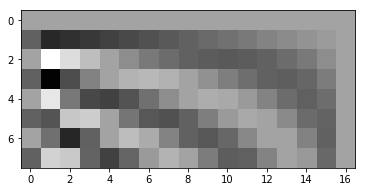

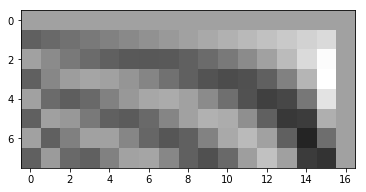

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 7
image = [[0.25] * 17 for i in range(n+1)]
image_marked = [[0.25] * 17 for i in range(n+1)]

for a in range(17):
    b = [1.0/4.0, 1.0/4.0]
    for i in range(n):
        #print(a,i)
        b[1] = -b[1]
        average = a*b[0] + (16-a)*b[1]
        average /= 16.0

        b[0] = 2*average - b[0]
        b[1] = 2*average - b[1]
        
        image[i+1][a] = b[0]
        image_marked[i+1][a] = b[1]

image[1][0] = -0.25
image[2][0] = 0.25
image[3][0] = -0.25
image[4][0] = 0.25
image[5][0] = -0.25
image[6][0] = 0.25
image[7][0] = -0.25
image_marked[1][16] = 0.25
image_marked[2][16] = 0.25
image_marked[3][16] = 0.25
image_marked[4][16] = 0.25
image_marked[5][16] = 0.25
image_marked[6][16] = 0.25
image_marked[7][16] = 0.25

#画像の表示
plt.imshow(image, cmap = 'gray', vmin = -1, interpolation = 'none')
plt.show()
plt.imshow(image_marked, cmap = 'gray', vmin = -1, interpolation = 'none')
plt.show()

・量子逆Fourier変換 (Inv-QFT)

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 3
b = [1.0/4.0, 1.0/4.0]
print(b[0], b[1])

c_0 = [0.0]*4
c_0[0] = b[0]
c_1 = [0.0]*4
c_1[0] = b[0]

for i in range(3):
    b[1] = -b[1]
    average = a*b[0] + (16-a)*b[1]
    average /= 16.0

    b[0] = 2*average - b[0]
    b[1] = 2*average - b[1]
    #print(b[0], b[1])
    
    c_0[i+1] = b[0]
    c_1[i+1] = b[1]
    
print(c_0)

F_inv = np.array([[1, 1, 1, 1], [1, -1j, -1, 1j], [1, -1, 1, -1], [1, 1j, -1, -1j]])
F_inv /= 2.0

sample = np.array(c_0)
temp = np.dot(F_inv, sample)
result = np.real(temp*np.conj(temp))
sample = np.array(c_1)
temp = np.dot(F_inv, sample)
result = (result*a + np.real(temp*np.conj(temp))*(16-a))/16.0

result[0], result[2], result[1]

0.25 0.25
[0.25, -0.5625, 0.453125, -0.00390625]


(0.018310546875, 0.079345703125, 0.076171875)

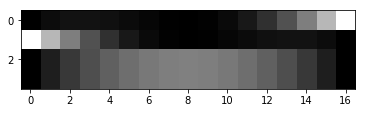

In [138]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 3
image = [[100.0] * 17 for i in range(n+1)]
F_inv = np.array([[1, 1, 1, 1], [1, -1j, -1, 1j], [1, -1, 1, -1], [1, 1j, -1, -1j]])
F_inv /= 2.0

for a in range(17):
    pre_QFT = [0.25]*(n+1)
    pre_QFT_marked = [0.25]*(n+1)
    b = [1.0/4.0, 1.0/4.0]
    for i in range(n):
        b[1] = -b[1]
        average = a*b[0] + (16-a)*b[1]
        average /= 16.0

        b[0] = 2*average - b[0]
        b[1] = 2*average - b[1]

        pre_QFT[i+1] = b[0]
        pre_QFT_marked[i+1] = b[1]
        
    pre_QFT = np.array(pre_QFT)
    temp = np.dot(F_inv, pre_QFT)
    result = np.real(temp*np.conj(temp))
    pre_QFT_marked = np.array(pre_QFT_marked)
    temp_marked = np.dot(F_inv, pre_QFT_marked)
    result_marked = np.real(temp_marked*np.conj(temp_marked))
    result = (result*a + result_marked*(16-a))/16.0
    
    #for i in range(n+1):
     #   image[i][a] = result[i]
    
    # 順番入れ替え...
    image[0][a] = result[0]
    image[1][a] = result[2]
    image[2][a] = result[1]
    image[3][a] = result[3]


#画像の表示
plt.imshow(image, cmap = 'gray', vmin = 0, interpolation = 'none')
plt.show()

・一般の場合に対応 (n=3,7,15...)

In [154]:
import cmath

n = 3
F_inv = [[0.0] * (n+1) for i in range(n+1)]
for i in range(n+1):
    for j in range(n+1):
        F_inv[i][j] = i*j
        F_inv[i][j] = cmath.exp(1.0j*2*np.pi*F_inv[i][j]/(n+1))
F_inv /= np.sqrt(n+1)

F_inv

array([[ 5.00000000e-01+0.0000000e+00j,  5.00000000e-01+0.0000000e+00j,
         5.00000000e-01+0.0000000e+00j,  5.00000000e-01+0.0000000e+00j],
       [ 5.00000000e-01+0.0000000e+00j,  3.06161700e-17+5.0000000e-01j,
        -5.00000000e-01+6.1232340e-17j, -9.18485099e-17-5.0000000e-01j],
       [ 5.00000000e-01+0.0000000e+00j, -5.00000000e-01+6.1232340e-17j,
         5.00000000e-01-1.2246468e-16j, -5.00000000e-01+1.8369702e-16j],
       [ 5.00000000e-01+0.0000000e+00j, -9.18485099e-17-5.0000000e-01j,
        -5.00000000e-01+1.8369702e-16j,  2.75545530e-16+5.0000000e-01j]])

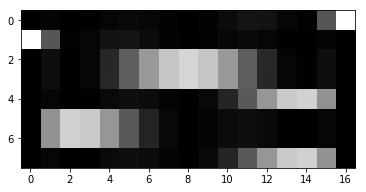

In [172]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cmath

n = 7
F_inv = [[0.0] * (n+1) for i in range(n+1)]
for i in range(n+1):
    for j in range(n+1):
        F_inv[i][j] = i*j
        F_inv[i][j] = cmath.exp(1.0j*2*np.pi*F_inv[i][j]/(n+1))
F_inv /= np.sqrt(n+1)

image = [[100.0] * 17 for i in range(n+1)]

for a in range(17):
    pre_QFT = [0.25]*(n+1)
    pre_QFT_marked = [0.25]*(n+1)
    b = [1.0/4.0, 1.0/4.0]
    for i in range(n):
        b[1] = -b[1]
        average = a*b[0] + (16-a)*b[1]
        average /= 16.0

        b[0] = 2*average - b[0]
        b[1] = 2*average - b[1]

        pre_QFT[i+1] = b[0]
        pre_QFT_marked[i+1] = b[1]
        
    pre_QFT = np.array(pre_QFT)
    temp = np.dot(F_inv, pre_QFT)
    result = np.real(temp*np.conj(temp))
    pre_QFT_marked = np.array(pre_QFT_marked)
    temp_marked = np.dot(F_inv, pre_QFT_marked)
    result_marked = np.real(temp_marked*np.conj(temp_marked))
    result = (result*a + result_marked*(16-a))/16.0
    
    #for i in range(n+1):
     #   image[i][a] = result[i]
    
    # 入れ替え
    image[0][a] = result[0]
    image[1][a] = result[4]
    image[2][a] = result[2]
    image[3][a] = result[6]
    image[4][a] = result[1]
    image[5][a] = result[5]
    image[6][a] = result[3]
    image[7][a] = result[7]


#画像の表示
plt.imshow(image, cmap = 'gray', vmax = 0.3, vmin = 0, interpolation = 'none')
plt.show()